## Credit card spend

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

In [427]:
pwd

'C:\\Users\\DELL-IN\\Downloads\\Video\\AL\\Data Science Final Projects\\Start\\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION1'

In [428]:
cd "C:/Users/DELL-IN/Downloads/Video/AL/Data Science Final Projects/Start/3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION1/"

C:\Users\DELL-IN\Downloads\Video\AL\Data Science Final Projects\Start\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION1


In [429]:
credit=pd.read_csv('CREDIT CARD USERS DATA.csv')

C:\Users\DELL-IN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [430]:
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [431]:
credit.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=132)

In [432]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(115), object(17)
memory usage: 5.0+ MB


In [433]:
credit=credit.drop(['custid','age','birthmonth','ed','employ','income','lninc','lncreddebt','lnothdebt','spoused',
                   'pets_cats','pets_dogs','pets_birds','pets_reptiles','pets_small','pets_saltfish','pets_freshfish','address',
                'carvalue','commute','commutetime','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail',
                'commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','polview','vote','cardtenure',
                 'card2tenure','bfast','lnlongmon','lnlongten','lntollmon','lntollten','lnequipmon','lnequipten',
                'lncardmon','lncardten','lnwiremon','lnwireten','hourstv','longten','cardten'],axis=1)

## for variable removing

In [434]:

#custid: customerid, birthmonth: month of birth,employ: Years with current employer, (pets_cats,pets_dogs,pets_birds,pets_reptiles
#pets_small,pets_saltfish,pets_freshfish): not required in spend calculation, (commutetime,commutecar,commutemotorcycle,commutecarpool
#commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute):not required in spend calculation,
#polview,vote,bfast,hourstv-not required in spend calculation


# age,ed,income,lninc,lncreddebt,lnothdebt,spoused,address,carvalue,commute,cardtenure,card2tenure,lnlongmon,lnlongten,lntollmon,
#lntollten,lnequipmon,lnequipten,lncardmon,lncardten,lnwiremon,lnwireten : continous variables should be removed, their categorical varibles are given


In [435]:
#credit=credit.replace("#NULL!",'',regex=True)

In [436]:
credit.head()

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,2.00,1.0,2.0,3.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,5.00,0.0,2.0,4.0,2.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,4.00,1.0,6.0,2.0,2.0,0.0,5.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,3.00,0.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,2.00,0.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [437]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 83 columns):
region            5000 non-null float64
townsize          5000 non-null object
gender            5000 non-null float64
agecat            5000 non-null float64
edcat             5000 non-null float64
jobcat            5000 non-null float64
union             5000 non-null float64
empcat            5000 non-null float64
retire            5000 non-null float64
inccat            5000 non-null float64
debtinc           5000 non-null float64
creddebt          5000 non-null float64
othdebt           5000 non-null float64
default           5000 non-null float64
jobsat            5000 non-null float64
marital           5000 non-null float64
spousedcat        5000 non-null float64
reside            5000 non-null float64
pets              5000 non-null float64
homeown           5000 non-null float64
hometype          5000 non-null float64
addresscat        5000 non-null float64
cars          

In [438]:
credit.to_csv('credit.csv')

numerical and categorical 

In [439]:
num_var=['debtinc','creddebt','othdebt','pets','carditems','cardspent','card2items','card2spent','tenure','longmon','tollmon','tollten',
         'equipmon','equipten','cardmon','wiremon','wireten']

In [440]:
credit_num=credit[num_var]

In [441]:
credit_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
debtinc       5000 non-null float64
creddebt      5000 non-null float64
othdebt       5000 non-null float64
pets          5000 non-null float64
carditems     5000 non-null float64
cardspent     5000 non-null float64
card2items    5000 non-null float64
card2spent    5000 non-null float64
tenure        5000 non-null float64
longmon       5000 non-null float64
tollmon       5000 non-null float64
tollten       5000 non-null float64
equipmon      5000 non-null float64
equipten      5000 non-null float64
cardmon       5000 non-null float64
wiremon       5000 non-null float64
wireten       5000 non-null float64
dtypes: float64(17)
memory usage: 664.1 KB


In [442]:
credit_num.isnull().any()

debtinc       False
creddebt      False
othdebt       False
pets          False
carditems     False
cardspent     False
card2items    False
card2spent    False
tenure        False
longmon       False
tollmon       False
tollten       False
equipmon      False
equipten      False
cardmon       False
wiremon       False
wireten       False
dtype: bool

In [443]:
#credit_num=credit_num.replace("#NULL!",'',regex=True)

In [444]:
credit_num.head()

,debtinc,creddebt,othdebt,pets,carditems,cardspent,card2items,card2spent,tenure,longmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,wireten
0,11.1,1.20,2.24,0.0,5.0,81.66,4.0,67.80,5.0,6.50,29.0,161.05,29.50,126.1,14.25,0.00,0.00
1,18.6,1.22,1.57,6.0,5.0,42.60,2.0,34.94,39.0,8.90,0.0,0.00,54.85,1975.0,16.00,45.65,1683.55
2,9.9,0.93,2.54,3.0,9.0,184.22,7.0,175.75,65.0,28.40,0.0,0.00,0.00,0.0,23.00,0.00,0.00
3,5.7,0.02,1.12,0.0,17.0,340.99,1.0,18.42,36.0,6.00,0.0,0.00,0.00,0.0,21.00,0.00,0.00
4,1.7,0.21,0.18,0.0,8.0,255.10,7.0,252.73,21.0,3.05,16.5,387.70,0.00,0.0,17.25,19.05,410.80


In [445]:
cat_var=credit.columns.difference(num_var)

In [446]:
credit_cat=credit[cat_var]

In [447]:
#credit_cat=credit_cat.replace("#NULL!",'',regex=True)

In [448]:
credit_cat.head()

,active,addresscat,agecat,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,...,response_01,response_02,response_03,retire,spousedcat,tollfree,townsize,union,voice,wireless
0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,...,0.0,1.0,0.0,0.0,-1.0,1.0,2.00,1.0,1.0,0.0
1,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,5.00,0.0,1.0,1.0
2,0.0,5.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,4.00,0.0,0.0,0.0
3,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,1.0,0.0,0.0,0.0,4.0,0.0,3.00,0.0,0.0,0.0
4,1.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,...,0.0,1.0,0.0,0.0,2.0,1.0,2.00,0.0,1.0,1.0


In [449]:
credit_cat.isnull().any()

active            False
addresscat        False
agecat            False
callcard          False
callid            False
callwait          False
carbought         False
carbuy            False
carcatvalue       False
card              False
card2             False
card2benefit      False
card2fee          False
card2tenurecat    False
card2type         False
cardbenefit       False
cardfee           False
cardtenurecat     False
cardtype          False
carown            False
cars              False
cartype           False
churn             False
commutecat        False
confer            False
default           False
ebill             False
edcat             False
empcat            False
equip             False
                  ...  
jobcat            False
jobsat            False
marital           False
multline          False
news              False
owncd             False
owndvd            False
ownfax            False
owngame           False
ownipod           False
ownpc           

In [450]:
credit_cat.townsize.value_counts()

1.00      1181
2.00       841
3.00       734
4.00       712
5.00       626
1.0        255
2.0        207
3.0        173
4.0        145
5.0        124
#NULL!       2
Name: townsize, dtype: int64

In [451]:
credit_cat['townsize']=credit_cat['townsize'].replace(to_replace='#NULL!', value=np.NaN)
credit_cat['townsize']=credit_cat['townsize'].astype('float')
credit_cat['townsize']=credit_cat['townsize'].fillna(credit_cat['townsize'].mode()[0])

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [452]:
credit_cat.townsize.value_counts()

1.0    1438
2.0    1048
3.0     907
4.0     857
5.0     750
Name: townsize, dtype: int64

In [453]:
# Mapping cars and commutetime variable to make them categorical

credit_cat['cars'] = pd.cut(credit_cat['cars'], bins=[-1, 2, 5, 8], labels=['0-2', '3-5', '6-8'])
credit_cat['reside'] = pd.cut(credit_cat['reside'], bins=[0, 3, 6, 10], labels=['1-3', '4-6', '7-9'])

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [454]:
for i in cat_var:
    credit_cat[i]=credit_cat[i].astype('object')

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [455]:
credit_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 66 columns):
active            5000 non-null object
addresscat        5000 non-null object
agecat            5000 non-null object
callcard          5000 non-null object
callid            5000 non-null object
callwait          5000 non-null object
carbought         5000 non-null object
carbuy            5000 non-null object
carcatvalue       5000 non-null object
card              5000 non-null object
card2             5000 non-null object
card2benefit      5000 non-null object
card2fee          5000 non-null object
card2tenurecat    5000 non-null object
card2type         5000 non-null object
cardbenefit       5000 non-null object
cardfee           5000 non-null object
cardtenurecat     5000 non-null object
cardtype          5000 non-null object
carown            5000 non-null object
cars              5000 non-null object
cartype           5000 non-null object
churn             5000 non-null obj

In [456]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [457]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T

In [458]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
debtinc,5000.0,0.0,49770.80,9.954160,8.80,6.399783,4.095723e+01,0.0,0.7000,1.9000,2.800,5.1000,8.80,13.6000,18.600,22.2000,29.2000,43.10
creddebt,5000.0,0.0,9286.82,1.857364,0.93,3.415789,1.166762e+01,0.0,0.0300,0.1000,0.180,0.3900,0.93,2.0600,4.300,6.3715,14.2804,109.07
othdebt,5000.0,0.0,18272.28,3.654456,2.10,5.395214,2.910833e+01,0.0,0.1100,0.2900,0.460,0.9800,2.10,4.3100,8.060,11.8120,24.0618,141.46
pets,5000.0,0.0,15337.00,3.067400,2.00,3.414497,1.165879e+01,0.0,0.0000,0.0000,0.000,0.0000,2.00,5.0000,8.000,10.0000,13.0000,21.00
carditems,5000.0,0.0,50887.00,10.177400,10.00,3.391140,1.149983e+01,0.0,2.0000,5.0000,6.000,8.0000,10.00,12.0000,15.000,16.0000,19.0000,23.00
cardspent,5000.0,0.0,1686012.60,337.202520,276.36,245.145068,6.009610e+04,0.0,40.8195,91.3045,122.534,183.3775,276.36,418.5375,610.062,782.3155,1215.8072,3926.41
card2items,5000.0,0.0,23333.00,4.666600,5.00,2.497017,6.235091e+00,0.0,0.0000,1.0000,1.000,3.0000,5.00,6.0000,8.000,9.0000,11.0000,15.00
card2spent,5000.0,0.0,804380.55,160.876110,125.34,146.292771,2.140157e+04,0.0,0.0000,14.8195,28.639,66.9675,125.34,208.3100,324.718,419.4470,712.1298,2069.25
tenure,5000.0,0.0,191024.00,38.204800,38.00,22.661888,5.135612e+02,0.0,1.0000,4.0000,7.000,18.0000,38.00,59.0000,69.000,72.0000,72.0000,72.00
longmon,5000.0,0.0,67357.25,13.471450,9.55,12.773381,1.631593e+02,0.9,1.8500,2.9000,3.700,5.7000,9.55,16.5500,27.000,36.7575,65.2010,179.85


In [459]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

credit_num=credit_num.apply(lambda x: outlier_capping(x))

In [460]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
debtinc,5000.0,0.0,49570.600,9.914120,8.80,6.241691,38.958700,0.7000,0.700000,1.9000,2.800,5.1000,8.80,13.6000,18.600,22.2000,29.200000,29.2000
creddebt,5000.0,0.0,8791.860,1.758372,0.93,2.380783,5.668128,0.0300,0.030000,0.1000,0.180,0.3900,0.93,2.0600,4.300,6.3715,14.280004,14.2804
othdebt,5000.0,0.0,17612.160,3.522432,2.10,4.221718,17.822902,0.1100,0.110000,0.2900,0.460,0.9800,2.10,4.3100,8.060,11.8120,24.060018,24.0618
pets,5000.0,0.0,15246.000,3.049200,2.00,3.351213,11.230625,0.0000,0.000000,0.0000,0.000,0.0000,2.00,5.0000,8.000,10.0000,13.000000,13.0000
carditems,5000.0,0.0,50878.000,10.175600,10.00,3.348045,11.209407,2.0000,2.000000,5.0000,6.000,8.0000,10.00,12.0000,15.000,16.0000,19.000000,19.0000
cardspent,5000.0,0.0,1668122.385,333.624477,276.36,221.377375,49007.942233,40.8195,40.829895,91.3045,122.534,183.3775,276.36,418.5375,610.062,782.3155,1215.800072,1215.8072
card2items,5000.0,0.0,23282.000,4.656400,5.00,2.466324,6.082756,0.0000,0.000000,1.0000,1.000,3.0000,5.00,6.0000,8.000,9.0000,11.000000,11.0000
card2spent,5000.0,0.0,793007.580,158.601516,125.34,133.230318,17750.317522,0.0000,0.000000,14.8195,28.639,66.9675,125.34,208.3100,324.718,419.4470,712.100298,712.1298
tenure,5000.0,0.0,191027.000,38.205400,38.00,22.660890,513.515914,1.0000,1.000000,4.0000,7.000,18.0000,38.00,59.0000,69.000,72.0000,72.000000,72.0000
longmon,5000.0,0.0,66363.200,13.272640,9.55,11.551690,133.441533,1.8500,1.850000,2.9000,3.700,5.7000,9.55,16.5500,27.000,36.7575,65.200010,65.2010


In [461]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=credit_cat.apply(lambda x: cat_summary(x))

In [462]:
cat_summary.T

,N,NMISS,ColumnsNames
active,5000,0,"0.0 2670 1.0 2330 Name: active, dtype: i..."
addresscat,5000,0,3.0 1221 5.0 1157 4.0 1139 2.0 87...
agecat,5000,0,4.0 1222 5.0 1195 6.0 1068 3.0 89...
callcard,5000,0,"1.0 3581 0.0 1419 Name: callcard, dtype:..."
callid,5000,0,"0.0 2624 1.0 2376 Name: callid, dtype: i..."
callwait,5000,0,"0.0 2605 1.0 2395 Name: callwait, dtype:..."
carbought,5000,0,0.0 2901 1.0 1602 -1.0 497 Name: c...
carbuy,5000,0,"0.0 3195 1.0 1805 Name: carbuy, dtype: i..."
carcatvalue,5000,0,1.0 2399 2.0 1267 3.0 837 -1.0 ...
card,5000,0,4.0 1344 2.0 1247 3.0 1200 1.0 98...


In [463]:
# Make a new var Total_cardspent which is sum of primary card spend and secondary card spend
credit_num['Total_cardspent'] = credit_num['cardspent'] + credit_num['card2spent']

# Make a new var Total_carditems which is sum of primary card spend items and secondary card spend items
credit_num['Total_carditems'] = credit_num['carditems'] + credit_num['card2items']

In [464]:
credit_num.drop(['carditems', 'cardspent', 'card2items', 'card2spent'], inplace=True, axis=1)

In [465]:
credit_cat.gender = credit_cat.gender.map({0:'Male', 1:'Female'})

C:\Users\DELL-IN\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [466]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [467]:
#for c_feature in categorical_features

for c_feature in cat_var:
    credit_cat[c_feature] = credit_cat[c_feature].astype('category')
    credit_cat = create_dummies(credit_cat , c_feature )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [468]:
credit_cat

,active_1.0,addresscat_2.0,addresscat_3.0,addresscat_4.0,addresscat_5.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,callcard_1.0,...,spousedcat_4.0,spousedcat_5.0,tollfree_1.0,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1.0,voice_1.0,wireless_1.0
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,1
5,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
8,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Concat both num and cat

In [469]:
credit_both = pd.concat([credit_num, credit_cat], axis=1)

In [470]:
credit_both.head()

,debtinc,creddebt,othdebt,pets,tenure,longmon,tollmon,tollten,equipmon,equipten,...,spousedcat_4.0,spousedcat_5.0,tollfree_1.0,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1.0,voice_1.0,wireless_1.0
0,11.1,1.20,2.24,0.0,5.0,6.50,29.0,161.05,29.50,126.1,...,0,0,1,1,0,0,0,1,1,0
1,18.6,1.22,1.57,6.0,39.0,8.90,0.0,0.00,54.85,1975.0,...,0,0,0,0,0,0,1,0,1,1
2,9.9,0.93,2.54,3.0,65.0,28.40,0.0,0.00,0.00,0.0,...,0,0,0,0,0,1,0,0,0,0
3,5.7,0.03,1.12,0.0,36.0,6.00,0.0,0.00,0.00,0.0,...,1,0,0,0,1,0,0,0,0,0
4,1.7,0.21,0.18,0.0,21.0,3.05,16.5,387.70,0.00,0.0,...,0,0,1,1,0,0,0,0,1,1


In [471]:
credit_both.to_csv('full.csv')

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


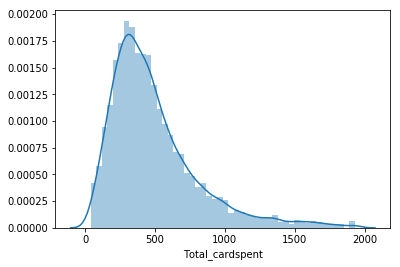

In [472]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(credit_both.Total_cardspent)

In [473]:
credit_both["ln_Total_cardspent"]= np.log(credit_both["Total_cardspent"]+1)

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


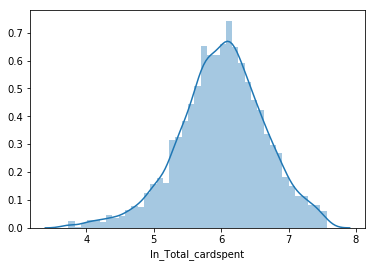

In [474]:
sns.distplot(credit_both.ln_Total_cardspent)

In [475]:
#Dropping the variables
credit_both=credit_both.drop(['Total_cardspent'],axis=1)

In [476]:
credit_both.corr()

,debtinc,creddebt,othdebt,pets,tenure,longmon,tollmon,tollten,equipmon,equipten,...,spousedcat_5.0,tollfree_1.0,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1.0,voice_1.0,wireless_1.0,ln_Total_cardspent
debtinc,1.000000,0.462596,0.526983,-0.002531,0.018607,0.012266,-0.008189,0.005262,-0.001188,0.011433,...,0.003937,-0.021065,0.001024,-0.025456,-0.024481,0.013140,-0.004927,-0.000223,-0.002080,0.015708
creddebt,0.462596,1.000000,0.640411,-0.009970,0.149677,0.124067,0.134850,0.170798,0.060940,0.103355,...,0.060986,0.077535,0.015607,-0.015848,-0.021487,-0.018029,0.000943,0.074360,0.085916,0.233055
othdebt,0.526983,0.640411,1.000000,0.011678,0.181639,0.141466,0.168206,0.205913,0.080952,0.125059,...,0.053983,0.102146,0.012198,-0.011450,-0.022742,0.006114,-0.007106,0.091921,0.118376,0.260740
pets,-0.002531,-0.009970,0.011678,1.000000,0.033579,0.025222,0.003462,0.019927,0.028144,0.026079,...,0.004510,-0.015058,0.005050,-0.007686,-0.002877,0.003025,0.023959,0.011229,0.004830,-0.005172
tenure,0.018607,0.149677,0.181639,0.033579,1.000000,0.716183,0.191747,0.454132,-0.035683,0.282105,...,0.028221,0.011710,0.008777,-0.012605,-0.024570,-0.005662,0.003615,-0.041394,-0.050233,0.051746
longmon,0.012266,0.124067,0.141466,0.025222,0.716183,1.000000,0.156409,0.356075,-0.042520,0.173578,...,0.014856,-0.004321,0.009956,-0.006748,-0.010714,-0.007437,0.021776,-0.048636,-0.045230,0.035471
tollmon,-0.008189,0.134850,0.168206,0.003462,0.191747,0.156409,1.000000,0.883660,0.117721,0.161534,...,0.038030,0.872731,0.018399,-0.002397,-0.001864,-0.018619,0.019444,0.387079,0.405862,0.073757
tollten,0.005262,0.170798,0.205913,0.019927,0.454132,0.356075,0.883660,1.000000,0.075362,0.224215,...,0.042267,0.654528,0.016181,-0.004123,-0.004856,-0.018888,0.009807,0.273450,0.278496,0.084630
equipmon,-0.001188,0.060940,0.080952,0.028144,-0.035683,-0.042520,0.117721,0.075362,1.000000,0.829186,...,0.112818,0.115436,0.021572,-0.006443,0.003581,-0.004213,0.016324,0.485653,0.520600,0.070284
equipten,0.011433,0.103355,0.125059,0.026079,0.282105,0.173578,0.161534,0.224215,0.829186,1.000000,...,0.108767,0.088967,0.010051,-0.006737,-0.009004,0.000198,0.008604,0.368404,0.397488,0.081270


In [477]:
#Splitting the data

feature_columns = credit_both.columns.difference( ['ln_Total_cardspent'] )
feature_columns

Index(['Total_carditems', 'active_1.0', 'addresscat_2.0', 'addresscat_3.0',
       'addresscat_4.0', 'addresscat_5.0', 'agecat_3.0', 'agecat_4.0',
       'agecat_5.0', 'agecat_6.0',
       ...
       'tollten', 'townsize_2.0', 'townsize_3.0', 'townsize_4.0',
       'townsize_5.0', 'union_1.0', 'voice_1.0', 'wireless_1.0', 'wiremon',
       'wireten'],
      dtype='object', length=150)

In [478]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_both[feature_columns],
                                                  credit_both['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [479]:
print(len( train_X ))
print(len( test_X))

3500
1500


In [480]:
import statsmodels.api as sm

In [481]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [482]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     55.08
Date:                Sat, 12 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:11:37   Log-Likelihood:                -1338.4
No. Observations:                3500   AIC:                             2971.
Df Residuals:                    3353   BIC:                             3876.
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9541      0.088     56.497      0.000       4.782       5.126
Total_carditems        0.0902      0.001     62.836      0.000       0.087       0.093
active_1.0            -0.0043      0.013     -0.331      0.741      -0.030       0.021
addresscat_2.0         0.0072      0.033      0.219      0.827      -0.057       0.072
addresscat_3.0        -0.0109      0.038     -0.288      0.774      -0.085       0.063
addresscat_4.0        -0.0253      0.041     -0.614      0.539      -0.106       0.056
addresscat_5.0        -0.0289      0.044     -0.655      0.513      -0.115       0.058
agecat_3.0             0.0716      0.036      1.982      0.048       0.001       0.142
agecat_4.0             0.0681      0.044      1.546      0.122      -0.018       0.154
agecat_5.0             0.0920      0.049      1.885      0.060      -0.004       0.188
agecat_6.0             0.0865      0.053      1.622      0.105      -0.018       0.191
callcard_1.0          -0.0416      0.022     -1.923      0.055      -0.084       0.001
callid_1.0            -0.0016      0.019     -0.085      0.932      -0.038       0.035
callwait_1.0           0.0013      0.018      0.071      0.943      -0.035       0.037
carbought_0.0         -0.0079      0.009     -0.841      0.401      -0.026       0.010
carbought_1.0          0.0111      0.010      1.090      0.276      -0.009       0.031
carbuy_1.0             0.0103      0.014      0.758      0.448      -0.016       0.037
carcatvalue_1.0       -0.0215      0.016     -1.382      0.167      -0.052       0.009
carcatvalue_2.0       -0.0051      0.013     -0.380      0.704      -0.031       0.021
carcatvalue_3.0        0.0298      0.022      1.381      0.167      -0.013       0.072
card2_2.0             -0.2587      0.021    -12.592      0.000      -0.299      -0.218
card2_3.0             -0.2590      0.020    -12.720      0.000      -0.299      -0.219
card2_4.0             -0.2979      0.022    -13.305      0.000      -0.342      -0.254
card2_5.0             -0.2216      0.029     -7.560      0.000      -0.279      -0.164
card2benefit_2.0       0.0229      0.018      1.284      0.199      -0.012       0.058
card2benefit_3.0      -0.0150      0.018     -0.842      0.400      -0.050       0.020
card2benefit_4.0       0.0039      0.018      0.222      0.824      -0.031       0.039
card2fee_1.0           0.0035      0.016      0.219      0.827      -0.028       0.035
card2tenurecat_2.0    -0.0020      0.043     -0.048      0.962      -0.085       0.081
card2tenurecat_3.0     0.0247      0.052      0.478      0.632      -0.077       0.126
card2tenurecat_4.0     0.0220      0.058      0.380      0.704      -0.091       0.135
card2tenurecat_5.0     0.0243      0.063      0.383      0.701      -0.100       0.149
card2type_2.0         -0.0170      0.0

In [483]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.2850506233330254
MSE: 0.1307436105906599
RMSE: 0.3615848594599335


In [484]:
# Check VIF

In [485]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [486]:
all_columns = "+".join(credit_num.columns.difference( ['Total_cardspent'] ))

my_formula = "ln_Total_cardspent~" + all_columns

print(my_formula)

ln_Total_cardspent~Total_carditems+cardmon+creddebt+debtinc+equipmon+equipten+longmon+othdebt+pets+tenure+tollmon+tollten+wiremon+wireten


In [487]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_Total_cardspent~Total_carditems+cardmon+creddebt+debtinc+equipmon+equipten+longmon+othdebt+pets+tenure+tollmon+tollten+wiremon+wireten', credit_both, return_type='dataframe')

In [488]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [489]:
vif[vif["VIF Factor"]>10]

,VIF Factor,features
0,23.672484,Intercept
12,10.285947,tollten
13,10.582421,wiremon
14,10.721928,wireten


In [490]:
# Drop variables on basis of VIF

In [491]:
credit_both=credit_both.drop(['tollten','wiremon','wireten'],axis=1)

In [492]:
#Splitting the data

feature_columns = credit_both.columns.difference( ['ln_Total_cardspent'] )
feature_columns

Index(['Total_carditems', 'active_1.0', 'addresscat_2.0', 'addresscat_3.0',
       'addresscat_4.0', 'addresscat_5.0', 'agecat_3.0', 'agecat_4.0',
       'agecat_5.0', 'agecat_6.0',
       ...
       'tenure', 'tollfree_1.0', 'tollmon', 'townsize_2.0', 'townsize_3.0',
       'townsize_4.0', 'townsize_5.0', 'union_1.0', 'voice_1.0',
       'wireless_1.0'],
      dtype='object', length=147)

In [493]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_both[feature_columns],
                                                  credit_both['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [494]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [495]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     56.15
Date:                Sat, 12 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:11:41   Log-Likelihood:                -1341.4
No. Observations:                3500   AIC:                             2971.
Df Residuals:                    3356   BIC:                             3858.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9406      0.087     56.620      0.000       4.770       5.112
Total_carditems        0.0903      0.001     62.864      0.000       0.087       0.093
active_1.0            -0.0036      0.013     -0.280      0.780      -0.029       0.022
addresscat_2.0         0.0085      0.033      0.259      0.795      -0.056       0.073
addresscat_3.0        -0.0108      0.038     -0.286      0.775      -0.085       0.063
addresscat_4.0        -0.0251      0.041     -0.607      0.544      -0.106       0.056
addresscat_5.0        -0.0283      0.044     -0.641      0.521      -0.115       0.058
agecat_3.0             0.0747      0.036      2.069      0.039       0.004       0.146
agecat_4.0             0.0721      0.044      1.639      0.101      -0.014       0.158
agecat_5.0             0.0945      0.049      1.937      0.053      -0.001       0.190
agecat_6.0             0.0897      0.053      1.684      0.092      -0.015       0.194
callcard_1.0          -0.0492      0.021     -2.338      0.019      -0.090      -0.008
callid_1.0            -0.0009      0.019     -0.049      0.961      -0.037       0.035
callwait_1.0           0.0008      0.018      0.042      0.966      -0.035       0.037
carbought_0.0         -0.0078      0.009     -0.838      0.402      -0.026       0.010
carbought_1.0          0.0107      0.010      1.053      0.293      -0.009       0.031
carbuy_1.0             0.0100      0.014      0.736      0.462      -0.017       0.036
carcatvalue_1.0       -0.0205      0.016     -1.320      0.187      -0.051       0.010
carcatvalue_2.0       -0.0053      0.013     -0.397      0.691      -0.032       0.021
carcatvalue_3.0        0.0287      0.022      1.330      0.184      -0.014       0.071
card2_2.0             -0.2592      0.021    -12.618      0.000      -0.299      -0.219
card2_3.0             -0.2601      0.020    -12.775      0.000      -0.300      -0.220
card2_4.0             -0.2988      0.022    -13.340      0.000      -0.343      -0.255
card2_5.0             -0.2213      0.029     -7.551      0.000      -0.279      -0.164
card2benefit_2.0       0.0244      0.018      1.366      0.172      -0.011       0.059
card2benefit_3.0      -0.0144      0.018     -0.808      0.419      -0.049       0.020
card2benefit_4.0       0.0055      0.018      0.311      0.755      -0.029       0.040
card2fee_1.0           0.0046      0.016      0.290      0.772      -0.027       0.036
card2tenurecat_2.0    -0.0011      0.043     -0.026      0.979      -0.085       0.082
card2tenurecat_3.0     0.0216      0.052      0.419      0.675      -0.080       0.123
card2tenurecat_4.0     0.0191      0.058      0.331      0.741      -0.094       0.133
card2tenurecat_5.0     0.0235      0.063      0.370      0.711      -0.101       0.148
card2type_2.0         -0.0151      0.0

In [496]:
train_X = sm.add_constant(train_X)
y_pred = lm.predict(train_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train_y, y_pred))
print('MSE:', metrics.mean_squared_error(train_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred)))

MAE: 0.2830638544393474
MSE: 0.12601540899342234
RMSE: 0.35498649128300974


In [497]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.2841108711460976
MSE: 0.1301508222881639
RMSE: 0.360764219800362


In [498]:
residuals = test_y - y_pred

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


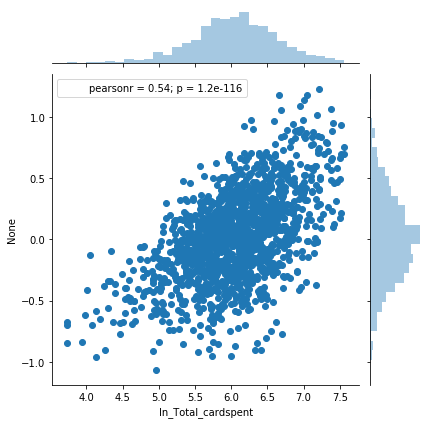

In [499]:
sns.jointplot(  test_y, residuals )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


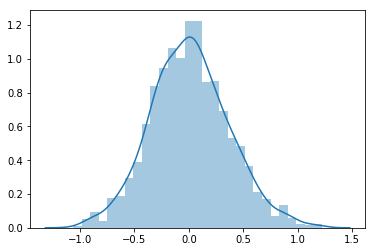

In [500]:
sns.distplot( residuals )

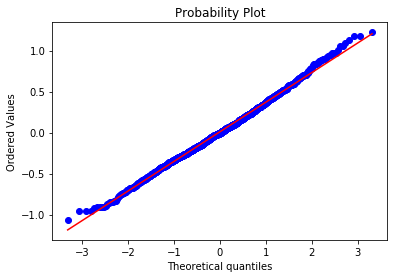

In [501]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [502]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [504]:
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 30)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(train_X, train_y)
names = train_X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

            Feat_names  F_Scores
7       commutecat_2.0  2.419467
0      Total_carditems  2.317118
15        internet_3.0  1.939542
25      spousedcat_5.0  1.898214
20          reason_2.0  1.847194
5    cardtenurecat_2.0  1.830202
23     response_03_1.0  1.635725
17             longmon  1.616628
24      spousedcat_2.0  1.585233
14        internet_2.0  1.511306
27        townsize_3.0  1.497490
6            churn_1.0  1.449934
11           edcat_5.0  1.439531
22     response_02_1.0  1.414023
19          ownpda_1.0  1.376073
4              cardmon  1.371385
16          jobsat_4.0  1.347658
3   card2tenurecat_2.0  1.337558
26        townsize_2.0  1.336563
28           voice_1.0  1.301843
10           ebill_1.0  1.285455
9          default_1.0  1.280678
8       commutecat_5.0  1.269598
12            equipmon  1.259380
18          ownfax_1.0  1.250487
1      carcatvalue_1.0  1.248224
29        wireless_1.0  1.241620
13            equipten  1.241405
21          reason_9.0  1.233667
2         

C:\Users\DELL-IN\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\DELL-IN\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [505]:
num=['longmon','cardmon','equipmon','equipten','Total_carditems']

In [506]:
cat=['internet','spousedcat','reason','cardtenurecat','card2tenurecat','townsize','churn','edcat','ownpda','jobsat', 'voice',
     'ebill','commutecat','ownfax','carcatvalue','wireless', 'card', 'response_02','response_03']

In [507]:
credit_num1 = credit_both[num]
credit_cat1 = credit[cat]

In [508]:
credit_cat1.townsize.value_counts()

1.00      1181
2.00       841
3.00       734
4.00       712
5.00       626
1.0        255
2.0        207
3.0        173
4.0        145
5.0        124
#NULL!       2
Name: townsize, dtype: int64

In [509]:
credit_cat1['townsize']=credit_cat1['townsize'].replace(to_replace='#NULL!', value=np.NaN)
credit_cat1['townsize']=credit_cat1['townsize'].astype('float')
credit_cat1['townsize']=credit_cat1['townsize'].fillna(credit_cat1['townsize'].mode()[0])

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [511]:
credit_cat1.townsize.value_counts()

1.0    1438
2.0    1048
3.0     907
4.0     857
5.0     750
Name: townsize, dtype: int64

In [512]:
for i in cat:
    credit[i]=credit[i].astype('object')

In [513]:
credit_num1['ln_Total_cardspent'] = credit_both["ln_Total_cardspent"]


#credit_num1['Total_carditems'] = credit_num['Total_carditems']

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [514]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [515]:
#for c_feature in categorical_features

for c_feat in cat:
    credit_cat1[c_feat] = credit_cat1[c_feat].astype('category')
    credit_cat1 = create_dummies(credit_cat1 , c_feat )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [516]:
credit_final = pd.concat([credit_num1, credit_cat1], axis=1)

In [517]:
#Splitting the data

feature_columns1 = credit_final.columns.difference( ['ln_Total_cardspent'] )
feature_columns1

Index(['Total_carditems', 'carcatvalue_1.0', 'carcatvalue_2.0',
       'carcatvalue_3.0', 'card2tenurecat_2.0', 'card2tenurecat_3.0',
       'card2tenurecat_4.0', 'card2tenurecat_5.0', 'card_2.0', 'card_3.0',
       'card_4.0', 'card_5.0', 'cardmon', 'cardtenurecat_2.0',
       'cardtenurecat_3.0', 'cardtenurecat_4.0', 'cardtenurecat_5.0',
       'churn_1.0', 'commutecat_2.0', 'commutecat_3.0', 'commutecat_4.0',
       'commutecat_5.0', 'ebill_1.0', 'edcat_2.0', 'edcat_3.0', 'edcat_4.0',
       'edcat_5.0', 'equipmon', 'equipten', 'internet_1.0', 'internet_2.0',
       'internet_3.0', 'internet_4.0', 'jobsat_2.0', 'jobsat_3.0',
       'jobsat_4.0', 'jobsat_5.0', 'longmon', 'ownfax_1.0', 'ownpda_1.0',
       'reason_2.0', 'reason_3.0', 'reason_4.0', 'reason_9.0',
       'response_02_1.0', 'response_03_1.0', 'spousedcat_1.0',
       'spousedcat_2.0', 'spousedcat_3.0', 'spousedcat_4.0', 'spousedcat_5.0',
       'townsize_2.0', 'townsize_3.0', 'townsize_4.0', 'townsize_5.0',
       'voice_

In [518]:
train_X2, test_X2, train_y2, test_y2 = train_test_split( credit_final[feature_columns1],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [519]:
train_X2 = sm.add_constant(train_X2)
lm1=sm.OLS(train_y2,train_X2).fit()

In [520]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sat, 12 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:12:42   Log-Likelihood:                -1668.3
No. Observations:                3500   AIC:                             3453.
Df Residuals:                    3442   BIC:                             3810.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7896      0.058     83.098      0.000       4.677       4.903
Total_carditems        0.0947      0.002     62.038      0.000       0.092       0.098
carcatvalue_1.0       -0.1290      0.025     -5.177      0.000      -0.178      -0.080
carcatvalue_2.0        0.0977      0.027      3.683      0.000       0.046       0.150
carcatvalue_3.0        0.3308      0.029     11.496      0.000       0.274       0.387
card2tenurecat_2.0    -0.0197      0.045     -0.436      0.663      -0.108       0.069
card2tenurecat_3.0     0.0113      0.054      0.210      0.834      -0.094       0.117
card2tenurecat_4.0    -0.0022      0.059     -0.038      0.970      -0.118       0.114
card2tenurecat_5.0    -0.0254      0.062     -0.408      0.683      -0.148       0.097
card_2.0              -0.4101      0.021    -19.624      0.000      -0.451      -0.369
card_3.0              -0.4071      0.021    -19.411      0.000      -0.448      -0.366
card_4.0              -0.4113      0.020    -20.285      0.000      -0.451      -0.372
card_5.0              -0.3631      0.036    -10.136      0.000      -0.433      -0.293
cardmon               -0.0002      0.001     -0.345      0.730      -0.001       0.001
cardtenurecat_2.0      0.0392      0.048      0.825      0.410      -0.054       0.133
cardtenurecat_3.0      0.0031      0.055      0.056      0.955      -0.105       0.111
cardtenurecat_4.0      0.0198      0.060      0.328      0.743      -0.099       0.138
cardtenurecat_5.0     -0.0043      0.063     -0.068      0.946      -0.129       0.120
churn_1.0              0.0216      0.018      1.199      0.231      -0.014       0.057
commutecat_2.0         0.0340      0.030      1.138      0.255      -0.025       0.093
commutecat_3.0        -0.0169      0.018     -0.932      0.351      -0.053       0.019
commutecat_4.0        -0.0199      0.021     -0.931      0.352      -0.062       0.022
commutecat_5.0         0.0169      0.041      0.415      0.678      -0.063       0.097
ebill_1.0             -0.0083      0.019     -0.445      0.656      -0.045       0.028
edcat_2.0             -0.0386      0.020     -1.895      0.058      -0.079       0.001
edcat_3.0              0.0051      0.024      0.218      0.828      -0.041       0.051
edcat_4.0             -0.0609      0.025     -2.408      0.016      -0.111      -0.011
edcat_5.0             -0.0207      0.035     -0.595      0.552      -0.089       0.048
equipmon              -0.0016      0.001     -1.778      0.075      -0.003       0.000
equipten            4.485e-05   1.63e-05      2.751      0.006    1.29e-05    7.68e-05
internet_1.0           0.0012      0.021      0.059      0.953      -0.039       0.042
internet_2.0          -0.0363      0.025     -1.448      0.148      -0.086       0.013
internet_3.0           0.0427      0.0

In [521]:
#Splitting the data

feature_columns2 = credit_final.columns.difference( ['ln_Total_cardspent','card2tenurecat_4.0'] )
feature_columns2

Index(['Total_carditems', 'carcatvalue_1.0', 'carcatvalue_2.0',
       'carcatvalue_3.0', 'card2tenurecat_2.0', 'card2tenurecat_3.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardmon', 'cardtenurecat_2.0', 'cardtenurecat_3.0',
       'cardtenurecat_4.0', 'cardtenurecat_5.0', 'churn_1.0', 'commutecat_2.0',
       'commutecat_3.0', 'commutecat_4.0', 'commutecat_5.0', 'ebill_1.0',
       'edcat_2.0', 'edcat_3.0', 'edcat_4.0', 'edcat_5.0', 'equipmon',
       'equipten', 'internet_1.0', 'internet_2.0', 'internet_3.0',
       'internet_4.0', 'jobsat_2.0', 'jobsat_3.0', 'jobsat_4.0', 'jobsat_5.0',
       'longmon', 'ownfax_1.0', 'ownpda_1.0', 'reason_2.0', 'reason_3.0',
       'reason_4.0', 'reason_9.0', 'response_02_1.0', 'response_03_1.0',
       'spousedcat_1.0', 'spousedcat_2.0', 'spousedcat_3.0', 'spousedcat_4.0',
       'spousedcat_5.0', 'townsize_2.0', 'townsize_3.0', 'townsize_4.0',
       'townsize_5.0', 'voice_1.0', 'wireless_1.0'],
      

In [522]:
train_X2, test_X2, train_y2, test_y2 = train_test_split( credit_final[feature_columns2],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [523]:
train_X2 = sm.add_constant(train_X2)
lm2=sm.OLS(train_y2,train_X2).fit()

In [524]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sat, 12 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:13:10   Log-Likelihood:                -1668.3
No. Observations:                3500   AIC:                             3451.
Df Residuals:                    3443   BIC:                             3802.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7894      0.058     83.288      0.000       4.677       4.902
Total_carditems        0.0947      0.002     62.048      0.000       0.092       0.098
carcatvalue_1.0       -0.1290      0.025     -5.177      0.000      -0.178      -0.080
carcatvalue_2.0        0.0977      0.027      3.683      0.000       0.046       0.150
carcatvalue_3.0        0.3308      0.029     11.497      0.000       0.274       0.387
card2tenurecat_2.0    -0.0184      0.030     -0.613      0.540      -0.077       0.040
card2tenurecat_3.0     0.0131      0.025      0.518      0.604      -0.036       0.063
card2tenurecat_5.0    -0.0233      0.025     -0.925      0.355      -0.073       0.026
card_2.0              -0.4102      0.021    -19.633      0.000      -0.451      -0.369
card_3.0              -0.4071      0.021    -19.421      0.000      -0.448      -0.366
card_4.0              -0.4113      0.020    -20.289      0.000      -0.451      -0.372
card_5.0              -0.3630      0.036    -10.138      0.000      -0.433      -0.293
cardmon               -0.0002      0.001     -0.346      0.730      -0.001       0.001
cardtenurecat_2.0      0.0382      0.039      0.975      0.330      -0.039       0.115
cardtenurecat_3.0      0.0016      0.038      0.041      0.967      -0.074       0.077
cardtenurecat_4.0      0.0180      0.036      0.494      0.621      -0.053       0.089
cardtenurecat_5.0     -0.0063      0.037     -0.168      0.866      -0.079       0.067
churn_1.0              0.0216      0.018      1.203      0.229      -0.014       0.057
commutecat_2.0         0.0340      0.030      1.138      0.255      -0.025       0.093
commutecat_3.0        -0.0169      0.018     -0.933      0.351      -0.053       0.019
commutecat_4.0        -0.0199      0.021     -0.930      0.352      -0.062       0.022
commutecat_5.0         0.0169      0.041      0.416      0.678      -0.063       0.097
ebill_1.0             -0.0083      0.019     -0.445      0.656      -0.045       0.028
edcat_2.0             -0.0387      0.020     -1.896      0.058      -0.079       0.001
edcat_3.0              0.0051      0.024      0.218      0.828      -0.041       0.051
edcat_4.0             -0.0609      0.025     -2.409      0.016      -0.111      -0.011
edcat_5.0             -0.0208      0.035     -0.597      0.551      -0.089       0.048
equipmon              -0.0016      0.001     -1.778      0.075      -0.003       0.000
equipten            4.481e-05   1.63e-05      2.753      0.006    1.29e-05    7.67e-05
internet_1.0           0.0012      0.021      0.060      0.953      -0.039       0.042
internet_2.0          -0.0363      0.025     -1.448      0.148      -0.085       0.013
internet_3.0           0.0427      0.025      1.696      0.090      -0.007       0.092
internet_4.0           0.0332      0.0

In [525]:
#Splitting the data

feature_columns3 = credit_final.columns.difference( ['ln_Total_cardspent','card2tenurecat_4.0','cardtenurecat_3.0'] )
feature_columns3

Index(['Total_carditems', 'carcatvalue_1.0', 'carcatvalue_2.0',
       'carcatvalue_3.0', 'card2tenurecat_2.0', 'card2tenurecat_3.0',
       'card2tenurecat_5.0', 'card_2.0', 'card_3.0', 'card_4.0', 'card_5.0',
       'cardmon', 'cardtenurecat_2.0', 'cardtenurecat_4.0',
       'cardtenurecat_5.0', 'churn_1.0', 'commutecat_2.0', 'commutecat_3.0',
       'commutecat_4.0', 'commutecat_5.0', 'ebill_1.0', 'edcat_2.0',
       'edcat_3.0', 'edcat_4.0', 'edcat_5.0', 'equipmon', 'equipten',
       'internet_1.0', 'internet_2.0', 'internet_3.0', 'internet_4.0',
       'jobsat_2.0', 'jobsat_3.0', 'jobsat_4.0', 'jobsat_5.0', 'longmon',
       'ownfax_1.0', 'ownpda_1.0', 'reason_2.0', 'reason_3.0', 'reason_4.0',
       'reason_9.0', 'response_02_1.0', 'response_03_1.0', 'spousedcat_1.0',
       'spousedcat_2.0', 'spousedcat_3.0', 'spousedcat_4.0', 'spousedcat_5.0',
       'townsize_2.0', 'townsize_3.0', 'townsize_4.0', 'townsize_5.0',
       'voice_1.0', 'wireless_1.0'],
      dtype='object')

In [526]:
train_X2, test_X2, train_y2, test_y2 = train_test_split( credit_final[feature_columns3],
                                                  credit_final['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [527]:
train_X2 = sm.add_constant(train_X2)
lm3=sm.OLS(train_y2,train_X2).fit()

In [528]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sat, 12 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:13:14   Log-Likelihood:                -1668.3
No. Observations:                3500   AIC:                             3449.
Df Residuals:                    3444   BIC:                             3794.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7903      0.054     88.664      0.000       4.684       4.896
Total_carditems        0.0947      0.002     62.058      0.000       0.092       0.098
carcatvalue_1.0       -0.1290      0.025     -5.178      0.000      -0.178      -0.080
carcatvalue_2.0        0.0977      0.027      3.688      0.000       0.046       0.150
carcatvalue_3.0        0.3309      0.029     11.501      0.000       0.274       0.387
card2tenurecat_2.0    -0.0179      0.028     -0.643      0.520      -0.073       0.037
card2tenurecat_3.0     0.0136      0.022      0.612      0.541      -0.030       0.057
card2tenurecat_5.0    -0.0232      0.025     -0.925      0.355      -0.072       0.026
card_2.0              -0.4102      0.021    -19.641      0.000      -0.451      -0.369
card_3.0              -0.4071      0.021    -19.424      0.000      -0.448      -0.366
card_4.0              -0.4113      0.020    -20.292      0.000      -0.451      -0.372
card_5.0              -0.3631      0.036    -10.143      0.000      -0.433      -0.293
cardmon               -0.0002      0.001     -0.346      0.729      -0.001       0.001
cardtenurecat_2.0      0.0370      0.026      1.409      0.159      -0.015       0.089
cardtenurecat_4.0      0.0169      0.025      0.686      0.493      -0.031       0.065
cardtenurecat_5.0     -0.0073      0.029     -0.254      0.799      -0.063       0.049
churn_1.0              0.0215      0.018      1.205      0.228      -0.014       0.057
commutecat_2.0         0.0340      0.030      1.138      0.255      -0.025       0.093
commutecat_3.0        -0.0169      0.018     -0.932      0.351      -0.052       0.019
commutecat_4.0        -0.0198      0.021     -0.930      0.352      -0.062       0.022
commutecat_5.0         0.0169      0.041      0.416      0.678      -0.063       0.096
ebill_1.0             -0.0083      0.019     -0.447      0.655      -0.045       0.028
edcat_2.0             -0.0387      0.020     -1.901      0.057      -0.079       0.001
edcat_3.0              0.0051      0.024      0.218      0.828      -0.041       0.051
edcat_4.0             -0.0609      0.025     -2.409      0.016      -0.110      -0.011
edcat_5.0             -0.0208      0.035     -0.596      0.551      -0.089       0.048
equipmon              -0.0016      0.001     -1.781      0.075      -0.003       0.000
equipten            4.486e-05   1.62e-05      2.765      0.006     1.3e-05    7.67e-05
internet_1.0           0.0012      0.021      0.059      0.953      -0.039       0.042
internet_2.0          -0.0363      0.025     -1.449      0.148      -0.085       0.013
internet_3.0           0.0426      0.025      1.696      0.090      -0.007       0.092
internet_4.0           0.0332      0.028      1.174      0.240      -0.022       0.089
jobsat_2.0             0.0172      0.0

In [ ]:
test

In [538]:
test_X2 = sm.add_constant(test_X2)
y_pred2 = lm3.predict(test_X2)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y2, y_pred2))
print('MSE:', metrics.mean_squared_error(test_y2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y2, y_pred2)))

MAE: 0.30947904636940227
MSE: 0.15426546122899457
RMSE: 0.39276642069937007


In [539]:
lm3=sm.OLS(test_y2,test_X2).fit()

In [540]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     41.07
Date:                Sat, 12 Jan 2019   Prob (F-statistic):          5.05e-253
Time:                        20:15:48   Log-Likelihood:                -690.49
No. Observations:                1500   AIC:                             1493.
Df Residuals:                    1444   BIC:                             1791.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.8479      0.083     58.353      0.000       4.685       5.011
Total_carditems        0.0909      0.003     36.234      0.000       0.086       0.096
carcatvalue_1.0       -0.1966      0.039     -5.018      0.000      -0.273      -0.120
carcatvalue_2.0        0.0265      0.042      0.636      0.525      -0.055       0.108
carcatvalue_3.0        0.2051      0.044      4.649      0.000       0.119       0.292
card2tenurecat_2.0     0.0169      0.044      0.382      0.702      -0.070       0.104
card2tenurecat_3.0     0.0442      0.035      1.270      0.204      -0.024       0.112
card2tenurecat_5.0    -0.0074      0.040     -0.187      0.852      -0.085       0.071
card_2.0              -0.4481      0.031    -14.580      0.000      -0.508      -0.388
card_3.0              -0.4144      0.031    -13.224      0.000      -0.476      -0.353
card_4.0              -0.3973      0.030    -13.155      0.000      -0.457      -0.338
card_5.0              -0.3911      0.056     -7.003      0.000      -0.501      -0.282
cardmon                0.0007      0.001      0.834      0.405      -0.001       0.002
cardtenurecat_2.0      0.0432      0.042      1.032      0.302      -0.039       0.125
cardtenurecat_4.0      0.0585      0.037      1.567      0.117      -0.015       0.132
cardtenurecat_5.0      0.0500      0.046      1.087      0.277      -0.040       0.140
churn_1.0              0.0462      0.027      1.699      0.090      -0.007       0.100
commutecat_2.0        -0.0456      0.044     -1.045      0.296      -0.131       0.040
commutecat_3.0        -0.0350      0.029     -1.225      0.221      -0.091       0.021
commutecat_4.0        -0.0005      0.033     -0.016      0.987      -0.065       0.064
commutecat_5.0        -0.0507      0.058     -0.876      0.381      -0.164       0.063
ebill_1.0              0.0071      0.028      0.254      0.800      -0.048       0.062
edcat_2.0              0.0291      0.031      0.928      0.353      -0.032       0.091
edcat_3.0              0.0081      0.037      0.220      0.826      -0.064       0.080
edcat_4.0              0.0302      0.039      0.777      0.437      -0.046       0.106
edcat_5.0             -0.0320      0.055     -0.580      0.562      -0.140       0.076
equipmon               0.0002      0.001      0.132      0.895      -0.002       0.003
equipten             1.26e-05   2.41e-05      0.522      0.602   -3.47e-05    5.99e-05
internet_1.0          -0.0033      0.032     -0.104      0.917      -0.066       0.059
internet_2.0          -0.0237      0.040     -0.599      0.549      -0.101       0.054
internet_3.0          -0.0442      0.039     -1.146      0.252      -0.120       0.032
internet_4.0          -0.0464      0.044     -1.059      0.290      -0.132       0.040
jobsat_2.0             0.0336      0.0

In [541]:
residuals2 = test_y2 - y_pred2

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


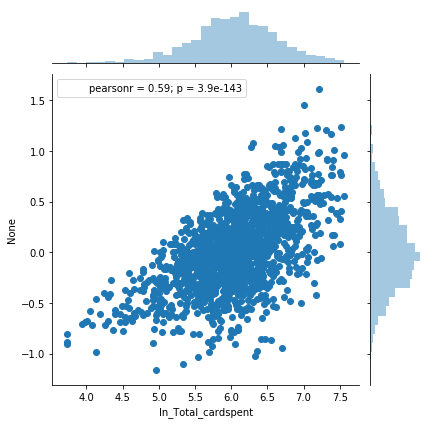

In [542]:
sns.jointplot(  test_y2, residuals2 )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


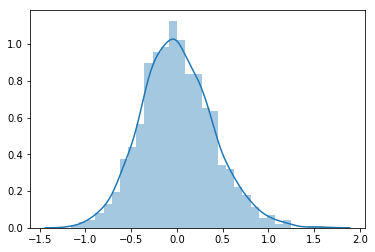

In [543]:
sns.distplot( residuals2 )

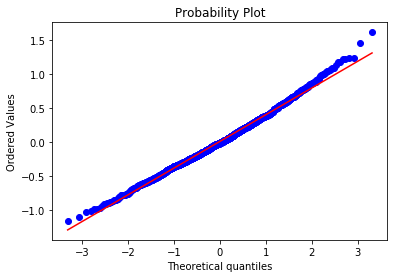

In [544]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals2, dist="norm", plot=pylab )
pylab.show()